# Información y Programación Financiera, TI, Algoritmos y Ciencia de Datos

In [1]:
# Información y Programación Financiera, TI, Algoritmos y Ciencia de Datos

Neftalí Valdez

<a href="http://twitter.com/neftalivldz" target="_blank">@neftalivldz</a> | <a href="mailto:nvaldez@tec.mx">nvaldez@tec.mx</a>

In [25]:
#!pip install pmdarima

In [1]:
from datafromsource import DataFromSource
import talib as ta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA


In [2]:
aapl = DataFromSource('AAPL.O')
df = aapl.get_prices()
df

AAPL.O,AAPL.O
Date,
2024-10-08,225.77
2024-10-09,229.54
2024-10-10,229.04
2024-10-11,227.55
2024-10-14,231.30
...,...
2025-10-02,257.13
2025-10-03,258.02
2025-10-06,256.69


## ARIMA

In [27]:
# Auto ARIMA to select optimal ARIMA parameters
model = auto_arima(df["AAPL.O"], seasonal=False, trace=True)
print(model.summary())

/Users/neftalivaldez/miniforge3/envs/lseg/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132:FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
/Users/neftalivaldez/miniforge3/envs/lseg/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132:FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
/Users/neftalivaldez/miniforge3/envs/lseg/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132:FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
/Users/neftalivaldez/miniforge3/envs/lseg/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132:FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
/Users/neftalivaldez/miniforge3/envs/lseg/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132:FutureWarning: 'force_all_finite' was renamed to 'ensure_all_fin

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1431.560, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1433.008, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1433.718, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1433.970, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1431.223, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1435.015, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.210 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  250
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -714.611
Date:                Sat, 04 Oct 2025   AIC                           1431.223
Time:                        15:46:37   BIC                           1434.740
Sample:                             0   HQIC                          1432.639
          

In [29]:
# Define the ARIMA model
def arima_forecast(history):
    # Fit the model
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit()
    
    # Make the prediction
    output = model_fit.forecast()
    yhat = output[0]
    return yhat

# Split data into train and test sets
X = df["AAPL.O"].values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]

# Walk-forward validation
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    # Generate a prediction
    yhat = arima_forecast(history)
    predictions.append(yhat)
    # Add the predicted value to the training set
    obs = test[t]
    history.append(obs)

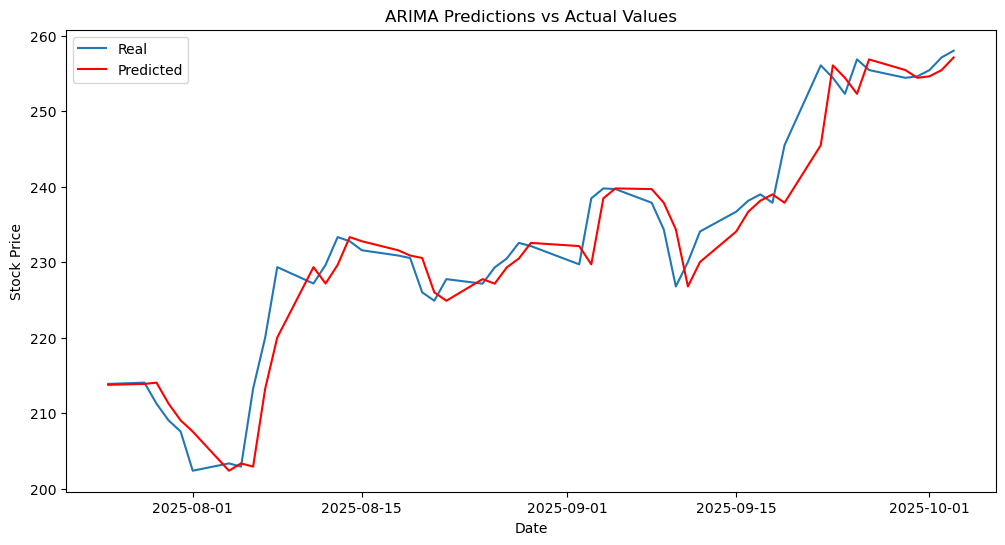

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(df.iloc[size:,:].index, test, label='Real')
plt.plot(df.iloc[size:,:].index, predictions, color='red', label='Predicted')
plt.title('ARIMA Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## Fourier Transform

np.fft.fft calculates the one-dimensional Discrete Fourier Transform (DFT) of a signal using the Fast Fourier Transform (FFT) algorithm. In essence, it converts a signal from the time domain to the frequency domain. 

### The core concept: Time domain vs. frequency domain
Time Domain: A signal represented in the time domain, such as a recording of sound waves, shows how its amplitude (or value) changes over time. Your input array to np.fft.fft is this time-domain signal.
Frequency Domain: The frequency domain reveals which frequencies make up the original signal. A simple signal like a pure sine wave has only a single frequency component. A complex sound, like a musical chord, is a combination of many different frequencies. The FFT finds and quantifies these component frequencies. 

### What the output represents
The output of np.fft.fft is a complex array of the same size as the input. Each complex number in the output represents a specific frequency component of the original signal.

For each complex number at index k:

Magnitude: The absolute value (np.abs()) of the complex number indicates the amplitude or strength of that frequency component in the original signal. A large magnitude means that frequency is a significant part of the signal.

Phase: The angle (np.angle()) of the complex number indicates the phase shift of that frequency component relative to a standard cosine wave. 

### The structure of the output array
The output array's elements are ordered in a specific, "standard" way: 
out[0] contains the zero-frequency term, which is the sum or average of the signal. For real-valued input, this is always a real number.
out[1:n/2] contains the positive-frequency terms.
out[n/2+1:] contains the negative-frequency terms in order of decreasingly negative frequency. 
For most analysis, especially when the input is purely real, the negative frequency components are redundant because of Hermitian symmetry (the negative frequency part is the complex conjugate of the positive frequency part).

In [3]:

close_fft = np.fft.fft(np.asarray(df["AAPL.O"].tolist()))
for num_ in [9]:
    fft_list_m10= np.copy(close_fft); fft_list_m10[num_:-num_]=0
fft_list_m10

array([ 5.63770900e+04+9.37916411e-13j,  1.76738032e+03-1.82264555e+03j,
       -1.15993249e+02+9.05220529e+02j,  2.82833372e+02+5.31759458e+02j,
       -1.26473026e+02+5.81295865e+02j,  7.60353266e+02+3.95236094e+02j,
       -8.55222565e+00-2.80737529e+02j, -2.13172530e+01+5.65928767e+00j,
        6.51695472e+01+4.28808141e+02j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000

## Inverse Discrete Fourier Transform (IDFT).
np.fft.ifft calculates the one-dimensional inverse Discrete Fourier Transform (IDFT). 

It is the inverse operation of np.fft.fft, converting a signal from the frequency domain back into the time domain. How it works ifft takes a complex array that represents a signal's frequency components (like the output of np.fft.fft) and computes the original time-domain signal. 
In mathematical terms, np.fft.ifft(np.fft.fft(a)) will return the original array a to within numerical precision. This makes it a critical tool for signal processing applications where you might manipulate a signal's frequency components and then need to convert it back to the time domain. 

### Key features 

Frequency to time: It reconstructs the time-domain signal from its individual frequency components (magnitude and phase).

Requires complex input: The input to np.fft.ifft is typically a complex array, as that is how frequency-domain data is represented.

Default normalization: By default, the inverse transform is scaled by \(1/N\), where \(N\) is the number of points in the input, to ensure the round trip (fft followed by ifft) recovers the original signal magnitude.

Input order: The input array must be ordered in the same way that np.fft.fft returns its output: the zero-frequency term first, followed by positive-frequency terms, and finally negative-frequency terms. 

In [4]:
symmetric_spectrum = np.fft.ifft(fft_list_m10)
symmetric_spectrum_real = symmetric_spectrum.real
symmetric_spectrum_real

array([245.52063181, 243.81262548, 242.0187569 , 240.18059514,
       238.33936644, 236.53456512, 234.8026667 , 233.17599477,
       231.68178587, 230.34148803, 229.17031793, 228.17709028,
       227.36432114, 226.72859471, 226.261172  , 225.94880898,
       225.7747432 , 225.71980071, 225.76357008, 225.88558801,
       226.06648088, 226.28900913, 226.53896603, 226.80588956,
       227.08355475, 227.37022423, 227.66864573, 227.98579714,
       228.33239142, 228.72216453, 229.17097993, 229.69579146,
       230.31351352, 231.03985149, 231.88814817, 232.86830126,
       233.9858045 , 235.24095998, 236.62830202, 238.13626415,
       239.74711035, 241.43714049, 243.17716798, 244.93325617,
       246.6676885 , 248.34013751, 249.9089888 , 251.33276909,
       252.57162297, 253.58877977, 254.35195248, 254.83461236,
       255.01708762, 254.88744131, 254.44209172, 253.68614875,
       252.63345066, 251.306297  , 249.73488544, 247.95647141,
       246.01428005, 243.95620927, 241.83337043, 239.69

In [5]:
close_fft = np.fft.fft(np.asarray(df["AAPL.O"].tolist()))
for num_ in [3]:
    fft_list_m10= np.copy(close_fft); fft_list_m10[num_:-num_]=0
symmetric_spectrum = np.fft.ifft(fft_list_m10)
symmetric_spectrum_real_3 = symmetric_spectrum.real


In [6]:
close_fft = np.fft.fft(np.asarray(df["AAPL.O"].tolist()))
for num_ in [6]:
    fft_list_m10= np.copy(close_fft); fft_list_m10[num_:-num_]=0
symmetric_spectrum = np.fft.ifft(fft_list_m10)
symmetric_spectrum_real_6 = symmetric_spectrum.real


In [7]:
close_fft = np.fft.fft(np.asarray(df["AAPL.O"].tolist()))
for num_ in [9]:
    fft_list_m10= np.copy(close_fft); fft_list_m10[num_:-num_]=0
symmetric_spectrum = np.fft.ifft(fft_list_m10)
symmetric_spectrum_real_9 = symmetric_spectrum.real


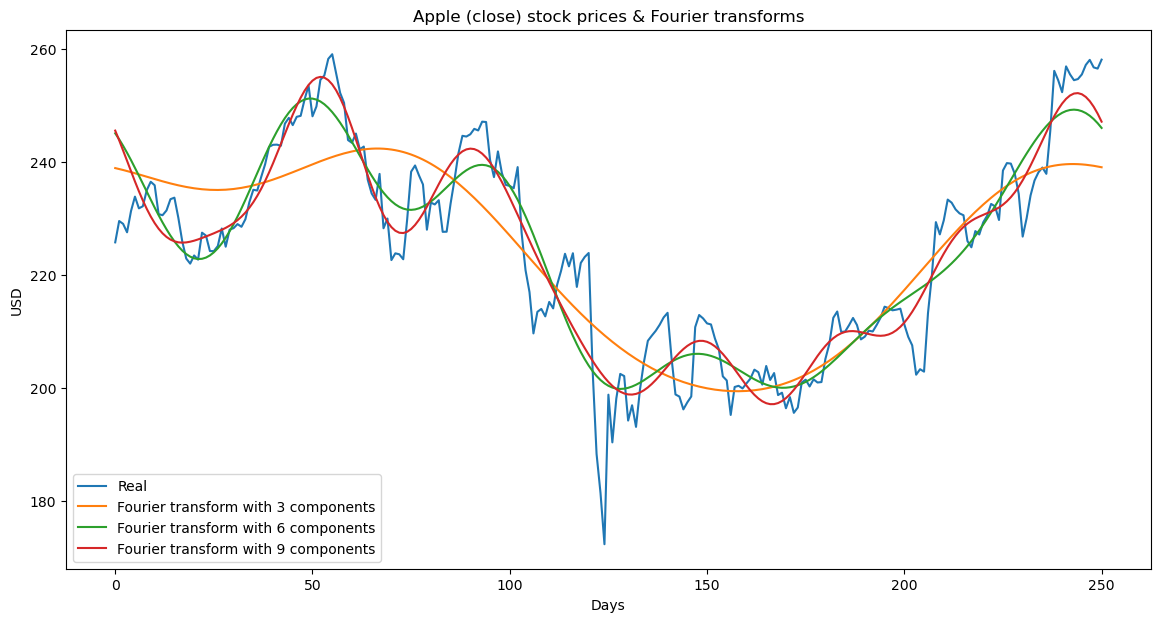

In [8]:
                # Calculate the Fourier Transform

# Plot the Fourier Transforms
plt.figure(figsize=(14, 7), dpi=100)
plt.plot(np.asarray(df["AAPL.O"].tolist()),  label='Real')
symmetric_spectrum_real
plt.plot(symmetric_spectrum_real_3, label='Fourier transform with 3 components'.format(num_))
plt.plot(symmetric_spectrum_real_6, label='Fourier transform with 6 components'.format(num_))
plt.plot(symmetric_spectrum_real_9, label='Fourier transform with 9 components'.format(num_))

plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Apple (close) stock prices & Fourier transforms')
plt.legend()
plt.show()

Bibliografía: 

Predicting Stock Prices: using ARIMA, Fourier Transformation and Deep Learning
shikhar kanaskar, Mar 12, 2023
https://medium.com/@shikharkanaskar97/predicting-stock-prices-using-arima-fourier-transformation-and-deep-learning-e5fb4f693c85
